<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JersonDavidPerezContreras/blob/main/Week_6_Data_Analysis_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Week 6: Data Analysis with Python (IBM)

Jerson David Perez Contreras

A01793810

# Labs

In [34]:
# Librerias

import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

##importar datos

path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)

## explorar datos
df.head()



,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [35]:
##Análisis de patrones de características individuales mediante la visualización

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [19]:
##Question #1:
##What is the data type of the column "peak-rpm"?


df['peak-rpm'].dtypes  ## Es de tipo Objeto

dtype('O')

In [20]:
# Correlacion
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


In [36]:
##Question #2: 
##Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

##Hint: if you would like to select those columns, use the following syntax: df[['bore','stroke','compression-ratio','horsepower']]


df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()



,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0.0, 53678.04154623067)

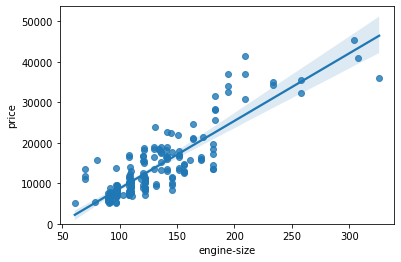

In [38]:
#Continuous Numerical Variables:

#Positive Linear Relationship
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [39]:
df[["engine-size", "price"]].corr()  ## Correlacion de 0.87, buena correlacion positiva

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


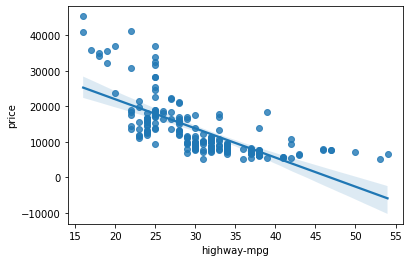

In [40]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [41]:
df[['highway-mpg', 'price']].corr()## Correlacion de -0.7, Buena correlacion NEGATIVA

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


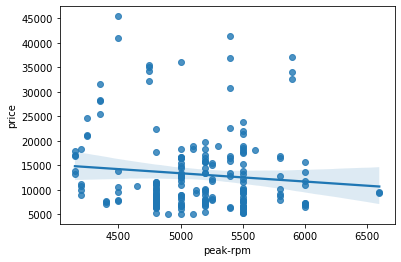

In [42]:
#Weak Linear Relationship
sns.regplot(x="peak-rpm", y="price", data=df)

In [44]:
df[['peak-rpm','price']].corr() # No hay buena correlacxion

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [45]:
#Question 3 a): 
##Find the correlation between x="stroke" and y="price".

#Hint: if you would like to select those columns, use the following syntax: df[["stroke","price"]].#

df[["stroke","price"]].corr() ## Not tienen una beuan correlacion

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


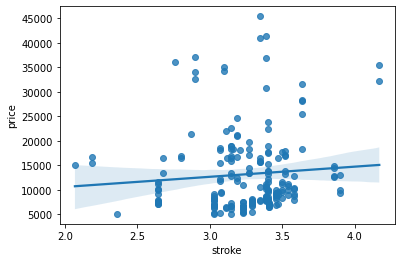

In [46]:
#Question 3 b):
#Given the correlation results between "price" and "stroke", do you expect a linear relationship?

#Verify your results using the function "regplot()".
sns.regplot(x="stroke", y="price", data=df) # no, los datos no tiene buena correlacion, a si que estan dispersos

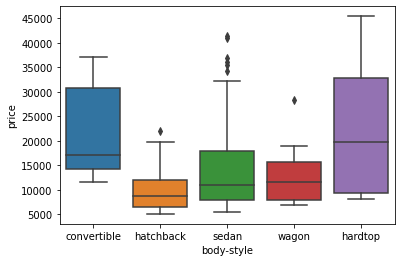

In [47]:
#Categorical Variable
sns.boxplot(x="body-style", y="price", data=df)

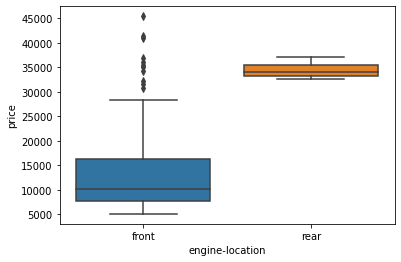

In [48]:
sns.boxplot(x="engine-location", y="price", data=df)

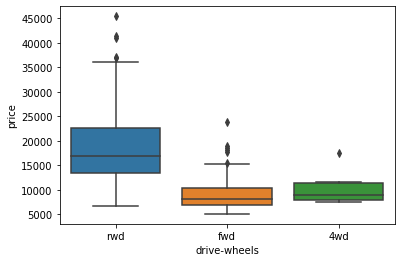

In [49]:
sns.boxplot(x="drive-wheels", y="price", data=df)

In [50]:
#3. Descriptive Statistical Analysis

df.describe() ## para revisar un analisis descriptivo

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [51]:
df.describe(include=['object']) ## mirar solo tipo objeto

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [52]:
##Value Counts ## Formas de hacefr conteos

df['drive-wheels'].value_counts() ## Metodo 1

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [53]:
df['drive-wheels'].value_counts().to_frame() ## Metodo 2

,drive-wheels
fwd,118
rwd,75
4wd,8


In [54]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()  ## Metodo 3
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [55]:
drive_wheels_counts.index.name = 'drive-wheels' ## Metodo 4
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [57]:
#4. Basics of Grouping
df['drive-wheels'].unique() ## Unicos valores

array(['rwd', 'fwd', '4wd'], dtype=object)

In [58]:
df_group_one = df[['drive-wheels','body-style','price']]

In [59]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one  ## AGRUPACMIENTO POR DRIVE -WHEELS

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [60]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1 ## gRUPOPS Y SUBGRUPOS

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [61]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot ##Pivot a Transponer Dado los grupos

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [62]:
#Question 4:
#Use the "groupby" function to find the average "price" of each car based on "body-style".

df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


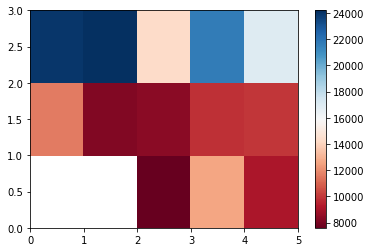

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline 

#Variables: Drive Wheels and Body Style vs. Price¶

plt.pcolor(grouped_pivot, cmap='RdBu')  # Relaizar Mapa con las agrupacioens
plt.colorbar()
plt.show() 

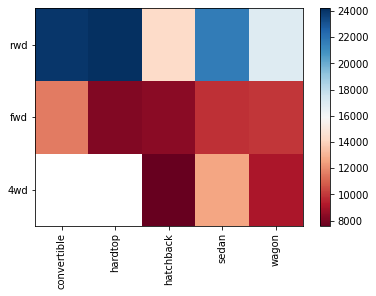

In [64]:
fig, ax = plt.subplots() ## Generar graficas con mdetalles
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [65]:
##Correlation and Causation

df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


# Graded Review Questions

##Question 1
Consider the dataframe "df". What method provides the summary statistics?

RTA: df.describe()

##Question 2

Consider the following dataframe:

Consider the following dataframe:

df_test = df['body-style', 'price']

The following operation is applied:

df_grp = df_test.groupby(['body-style'], as_index=False).mean()

What are resulting values of df_grp[‘price’]?

Rta= The average price for each body style.


#Question 3

Correlation implies causation:

RTA: Falso

#Question 4

What is the minimum possible value of Pearson's Correlation?

RTA= -1

# Question 5
What is the Pearson correlation between variables X and Y if X=Y:




#progreso

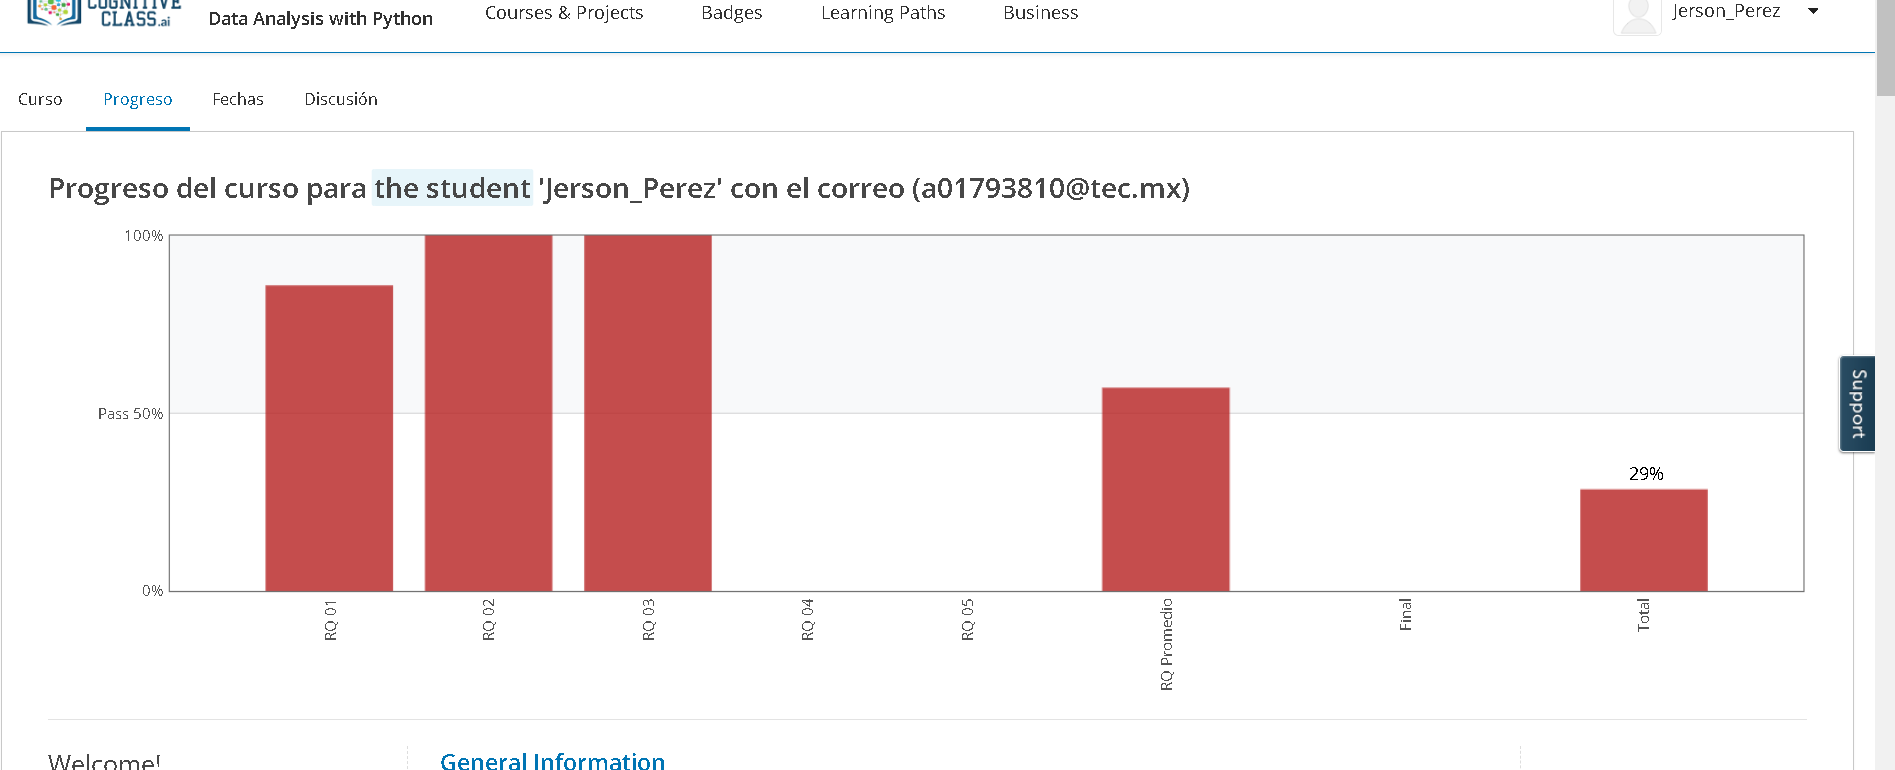